Names: Huda Humaira Ahmed, Emma Calvino

Student IDs: i6318123, i6328339

# Clinic 5 - Timeseries analysis (Bootcamp)

### Learning goals

After this clinic/bootcamp you should be able to:

- Fetch stock market data using `yfinance`.
- Visualize stock trends in different ways.
- Compute and interpret moving averages.
- Identify seasonality and trends in time series data.
- Build predictive models for timeseries (ARIMA).
- Identify the right order (p,d,q) for ARIMA models using ACF/PACF plots or cross-validation (AIC criterion)
- Make forecasts with timeseries and measure the errors.

##  Part 1: Mathematical finance 

Prior to the 1980s, banking and finance were well-known for being "boring"; investment banking was distinct from commercial banking and the primary role of the industry was handling "simple" (at least in comparison to today) financial instruments, such as loans. Deregulation (in the US happened under the Reagan administration), coupled with an influx of mathematics and computing power have transformed the industry from the "boring" business of banking to what it is today. 

* Advanced mathematics, such as analysis of the [Black-Scholes model](https://en.wikipedia.org/wiki/Black%E2%80%93Scholes_model), is now essential to finance. 
* Algorithms are now responsible for making split-second decisions. In fact, [the speed at which light travels is a limitation when designing trading systems](http://www.nature.com/news/physics-in-finance-trading-at-the-speed-of-light-1.16872). 
* [Machine learning and data mining techniques are popular](http://www.ft.com/cms/s/0/9278d1b6-1e02-11e6-b286-cddde55ca122.html#axzz4G8daZxcl) in the financial sector. For example, **high-frequency trading (HFT)** is a branch of algorithmic trading where computers make thousands of trades in short periods of time, engaging in complex strategies such as statistical arbitrage and market making. HFT was responsible for phenomena such as the [2010 flash crash](https://en.wikipedia.org/wiki/2010_Flash_Crash) and a [2013 flash crash](http://money.cnn.com/2013/04/24/investing/twitter-flash-crash/) prompted by a hacked [Associated Press tweet](http://money.cnn.com/2013/04/23/technology/security/ap-twitter-hacked/index.html?iid=EL) about an attack on the White House.

### Installing `yfinance`

We will use a package which might not be included in the Anaconda distribution, [**yfinance**](https://pypi.org/project/yfinance/), that can be installed via the command prompt: 

    pip install yfinance


In [1]:
%pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\emmxc\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#imports and setup

import numpy as np
import pandas as pd
#from pandas_datareader import data as pdr
from datetime import datetime

import yfinance as yf

import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('fivethirtyeight')
#plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

## 1.1 Getting and Visualizing Stock Data

### The `yfinance` package

Here we will use the `yfinance` [package](https://pypi.org/project/yfinance/) to get some data and import them since many of the import functions of `pandas_datareader` have been deprecated.

    Ticker: single ticker data
    Tickers: multiple tickers' data
    download: download market data for multiple tickers
    Market: get infomation about a market
    Search: quotes and news from search
    Sector and Industry: sector and industry information
    EquityQuery and Screener: build query to screen market

### The `pandas_datareader` package (for historical reasons)

`pandas_datareader` extracts data from various internet sources into a pandas DataFrame. Here are the currently listed available [modules](https://pydata.github.io/pandas-datareader/py-modindex.html):

	pandas_datareader.av.forex	
    pandas_datareader.av.quotes	
    pandas_datareader.av.sector	
    pandas_datareader.av.time_series	
    pandas_datareader.bankofcanada	
    pandas_datareader.econdb	
    pandas_datareader.enigma	
    pandas_datareader.eurostat	
    pandas_datareader.famafrench	
    pandas_datareader.fred	
    pandas_datareader.iex.daily	
    pandas_datareader.iex.deep	
    pandas_datareader.iex.market	
    pandas_datareader.iex.ref	
    pandas_datareader.iex.stats	
    pandas_datareader.iex.tops	
    pandas_datareader.moex	
    pandas_datareader.nasdaq_trader	
    pandas_datareader.naver	
    pandas_datareader.oecd	
    pandas_datareader.quandl	
    pandas_datareader.stooq	
    pandas_datareader.tiingo	
    pandas_datareader.tsp	
    pandas_datareader.wb	
    pandas_datareader.yahoo.actions	
    pandas_datareader.yahoo.components	
    pandas_datareader.yahoo.daily	
    pandas_datareader.yahoo.fx	
    pandas_datareader.yahoo.options	
    pandas_datareader.yahoo.quotes

Note there are various sources for financial date (yahoo, fred, iex...). Some of these APIs have turned to paid versions, therefore make `pandas_datareader` not very useful. However, we keep it here for historical reasons

Now let's get some data. We first plot the Apple stock.

In [3]:
start = datetime(2015, 2, 15)
end = datetime(2025, 2, 15)

AAPL = yf.Ticker("AAPL").history(start = start, end= end)

print(type(AAPL))
AAPL.tail()

<class 'pandas.core.frame.DataFrame'>


,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-02-10 00:00:00-05:00,229.570007,230.589996,227.199997,227.649994,33115600,0.25,0.0
2025-02-11 00:00:00-05:00,228.199997,235.229996,228.130005,232.619995,53718400,0.00,0.0
2025-02-12 00:00:00-05:00,231.199997,236.960007,230.679993,236.869995,45243300,0.00,0.0
2025-02-13 00:00:00-05:00,236.910004,242.339996,235.570007,241.529999,53614100,0.00,0.0
2025-02-14 00:00:00-05:00,241.250000,245.550003,240.990005,244.600006,40896200,0.00,0.0


What does this data mean? 
* **high** is the highest price of the stock on that trading day, 
* **low** the lowest price of the stock on that trading day, 
* **Open** is the price of the stock at the beginning of the trading day (it need not be the closing price of the previous trading day)
* **close** the price of the stock at closing time
* **Volume** indicates how many stocks were traded 
* **Adj Closed** is the price of the stock after adjusting for corporate actions. While stock prices are considered to be set mostly by traders, *stock splits* (when the company makes each extant stock worth two and halves the price) and *dividends* (payout of company profits per share) also affect the price of a stock and should be accounted for.

### Visualizing Stock Data

Now that we have stock data we can visualize it using the `matplotlib` package, called using a convenience method, `plot()` in pandas.

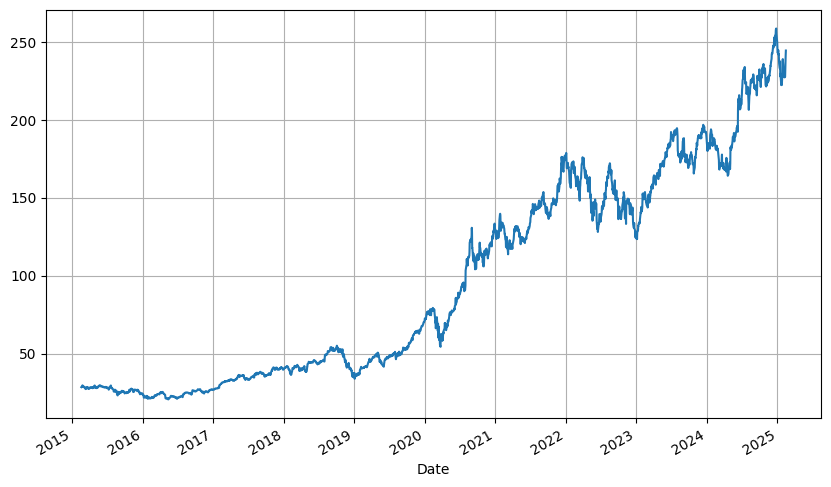

In [4]:
AAPL["Close"].plot(grid = True); # Plot the adjusted closing price of AAPL

### Task 1.1: Plotting multiple stocks together

For a variety of reasons, we may wish to plot multiple financial instruments together including:
* we may want to compare stocks
* compare them to the market or other securities such as [exchange-traded funds (ETFs)](https://en.wikipedia.org/wiki/Exchange-traded_fund).

Below we want to plot the adjusted close value for several stocks together. Pick the stocks for META (ticker is `META`) and Google (ticker is `GOOG`) for the same timeframe as the Apple one and plot them together. Create a single dataframe with all 3 stocks.

In [5]:
META = yf.Ticker("META").history(start = start, end= end)
GOOG = yf.Ticker("GOOG").history(start = start, end= end)

# Below I create a DataFrame consisting of the adjusted closing price of these stocks, first by making a list of these objects and using the join method
close = pd.DataFrame({"AAPL": AAPL["Close"], "META": META["Close"], "GOOG": GOOG["Close"]})

close.tail()


,AAPL,META,GOOG
Date,,,
2025-02-10 00:00:00-05:00,227.649994,717.400024,188.199997
2025-02-11 00:00:00-05:00,232.619995,719.799988,187.070007
2025-02-12 00:00:00-05:00,236.869995,725.380005,185.429993
2025-02-13 00:00:00-05:00,241.529999,728.559998,187.880005
2025-02-14 00:00:00-05:00,244.600006,736.669983,186.869995


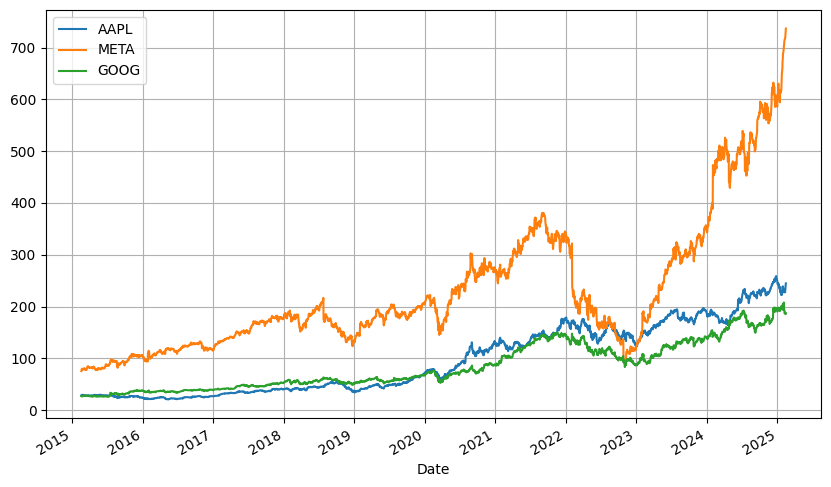

In [6]:
#here we plot it
close.plot(grid = True);

### Task 1.2: What do you notice on these plot? How easy is to compare the stock prices of the different companies?

*your comments go here*

The above plot shows the adjusted closing price of AAPL, META and GOOG over time. One observation is that META's stock price has a much larger range compared to AAPL and GOOG. This makes it a bit hard to directly compare their trends on the same scale. We can also observe that META appears to dominate the plot, even though percentage changes might be similar across all three stocks. For a better comparison, we could either have a common starting valye (eg, 100), or plotting their percentage changes.



To make comparable plots, we are going to plot the *stock returns since the beginning of the period of interest*:

$$
\text{return}_{t,0} = \frac{\text{price}_t}{\text{price}_0}
$$

This requires transforming the data. Do the transformation and save the data in a new data frame.

*Hint: The transformation is easy if you apply a lambda function on the dataframe

### Task 1.3: Create a dataframe to plot the stock return


In [7]:
#define a lambda function and then apply it on the dataframe
stock_return = close.apply(lambda x: x / x.iloc[0])
stock_return.head()

,AAPL,META,GOOG
Date,,,
2015-02-17 00:00:00-05:00,1.000000,1.000000,1.000000
2015-02-18 00:00:00-05:00,1.006962,1.014683,0.994216
2015-02-19 00:00:00-05:00,1.004850,1.050529,1.000055
2015-02-20 00:00:00-05:00,1.013064,1.056879,0.992834
2015-02-23 00:00:00-05:00,1.040444,1.042857,0.979865


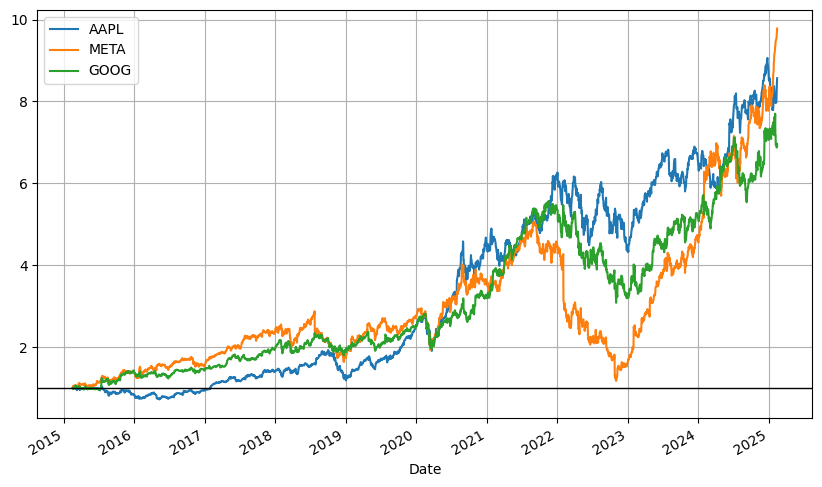

In [8]:
#here we plot the result
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 1);

### Task 1.4: Comment on the plot

*Things to mention: Is it more useful? How are the stocks correlated? Could i see the same info on the previous plot?*

*Your comments go here*

This plot is much more useful for comparing the performance of the three stocks because it normalizes and has a common starting point. This plot focuses on the relative growth whereas the previous plot showed absolute prices and made META's stock appear dominant. We can now observe that AAPL, META, and GOOG had similar trends, where there are periods of growth and downfalls happening around the same time. This indicates some level of correlation which the previous plot did not show clearly.

### Task 1.5: Compute other variations of the change of the series

Alternatively, we could plot the change of each stock per day. One way to do so would be to use the *percentage increase of a stock*:
$$
\text{increase}_t = \frac{\text{price}_{t} - \text{price}_{t-1}}{\text{price}_{t-1}}
$$

or the *log difference*.

$$
\text{change}_t = \log\left( \frac{\text{price}_{t}}{\text{price}_{t - 1}} \right) = \log(\text{price}_{t}) - \log(\text{price}_{t - 1})
$$

Here, $\log$ is the natural log. Log difference has a desirable property: the sum of the log differences can be interpreted as the total change (as a percentage) over the period summed. Log differences also more cleanly correspond to how stock prices are modeled in continuous time.

Note also the transformations we discussed in class (box-cox transformation).

In the code block below, obtain and plot the log differences of the data.

In [9]:
stock_change = close.apply(lambda x: np.log(x) - np.log(x.shift(1))) 
stock_change.head()

,AAPL,META,GOOG
Date,,,
2015-02-17 00:00:00-05:00,NaN,NaN,NaN
2015-02-18 00:00:00-05:00,0.006938,0.014576,-0.005801
2015-02-19 00:00:00-05:00,-0.002100,0.034718,0.005856
2015-02-20 00:00:00-05:00,0.008141,0.006026,-0.007247
2015-02-23 00:00:00-05:00,0.026668,-0.013356,-0.013148


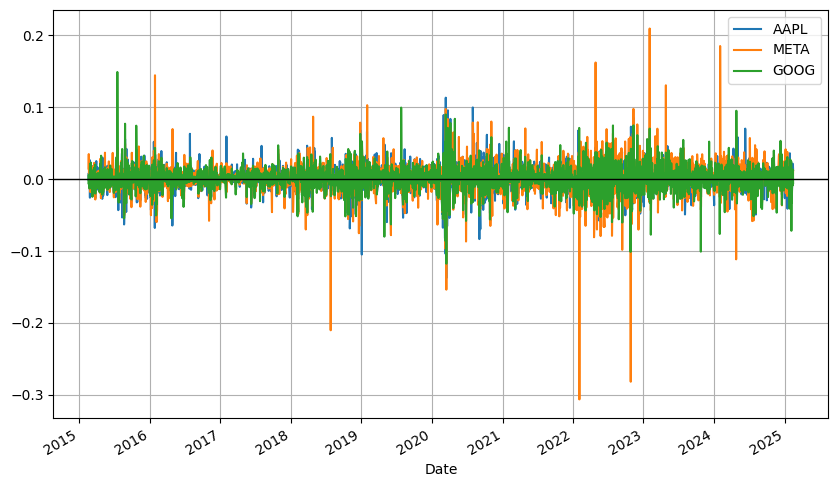

In [10]:
#plot stock change
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 1);

### Task 1.6: Would you go for the plot stock return or log difference? In which cases you would go for one or the other?

*Your answer goes here*

If you want to compare overall stock performance over time, the stock return plot is preferred since it shows relative growth from a common starting point. But if we are interested in daily price movements and correlations between stocks, the log difference plot is more useful as it shows percentage changes in a way that can be summed over time. 

### Task 1.7: Comparing stocks to the overall market 

We often want to compare the performance of stocks to the performance of the overall market. 
[SPY](https://finance.yahoo.com/quote/SPY/) is the ticker symbol for the SPDR S&P 500 exchange-traded mutual fund (ETF), which is a fund that has roughly the stocks in the [S&P 500 stock index](https://finance.yahoo.com/quote/%5EGSPC?p=^GSPC). 
This serves as one measure for the overal market.

Below we import the SPY series. 

You need to add it to the relevant dataframes and apply the same transformations. In the end plot the stock return and stock change plots again with the SPY.

In [11]:
SPY = yf.Ticker("SPY").history(start = start, end= end)
SPY.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains
Date,,,,,,,,
2025-02-10 00:00:00-05:00,604.030029,605.500000,602.739990,604.849976,26048700,0.0,0.0,0.0
2025-02-11 00:00:00-05:00,602.549988,605.859985,602.429993,605.309998,30056700,0.0,0.0,0.0
2025-02-12 00:00:00-05:00,599.200012,604.549988,598.510010,603.359985,45076100,0.0,0.0,0.0
2025-02-13 00:00:00-05:00,604.479980,609.940002,603.200012,609.729980,40921300,0.0,0.0,0.0
2025-02-14 00:00:00-05:00,609.940002,610.989990,609.070007,609.700012,26910400,0.0,0.0,0.0


In [69]:
#add it to close dataframe
close['SPY'] = SPY['Close']

spy_return = SPY['Close'].pct_change()  
stock_return['SPY'] = spy_return

spy_change = SPY['Close'].diff()  
stock_change['SPY'] = spy_change


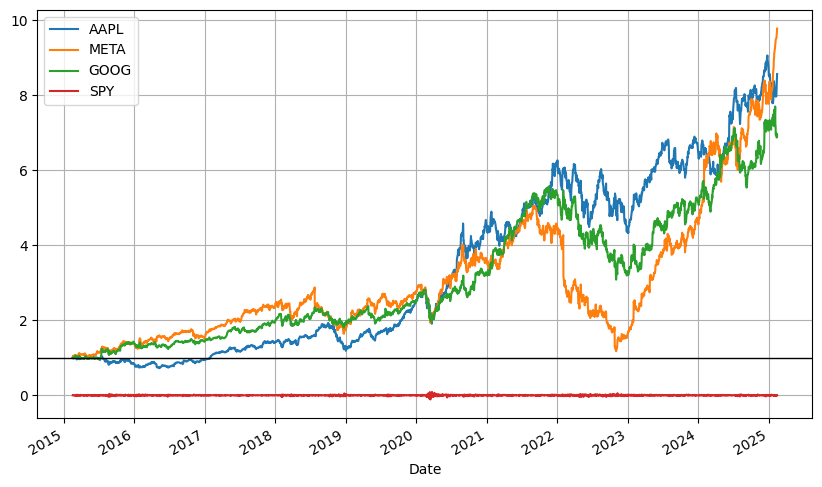

In [70]:
#plot all stocks and SPY
stock_return.plot(grid = True).axhline(y = 1, color = "black", lw = 1);

In [71]:
#add it to stock change
#already done before?


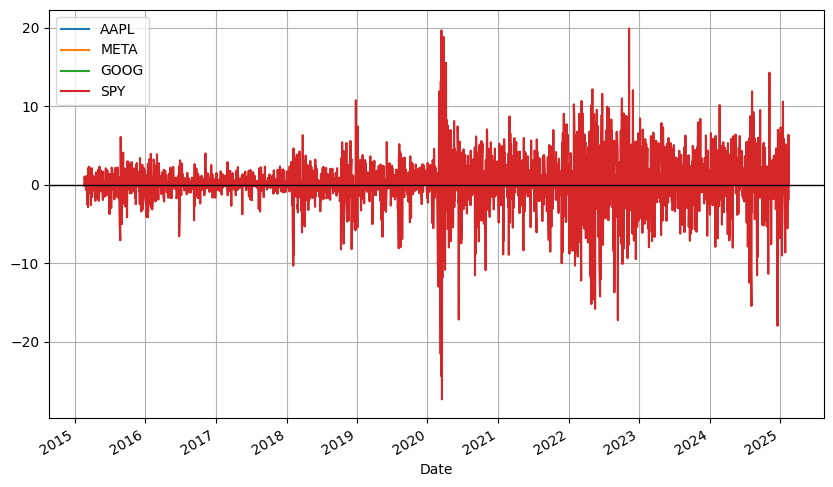

In [72]:
#plot the stock change with SPY
stock_change.plot(grid = True).axhline(y = 0, color = "black", lw = 1);

## 1.2 Moving Averages

In class we discussed the idea of moving averages. Here we repeat it:

For a time series $x_t$, the *$q$-day moving average at time $t$*, denoted $MA^q_t$, is the average of $x_t$ over the past $q$ days, 
$$
MA^q_t = \frac{1}{q} \sum_{i = 0}^{q-1} x_{t - i}
$$

The [`rolling`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) function in Pandas provides functionality for computing moving averages.

### Task 1.8: Create a 20-day moving average for Apple stock data and plot it alongside the stock price. 

Use the `rolling` function

In [73]:
#compute the 20d average
AAPL["20d"] = AAPL['Close'].rolling(window=20).mean()

Notice how late the rolling average begins. It cannot be computed until twenty days have passed. Note that this becomes more severe for slower moving averages. 

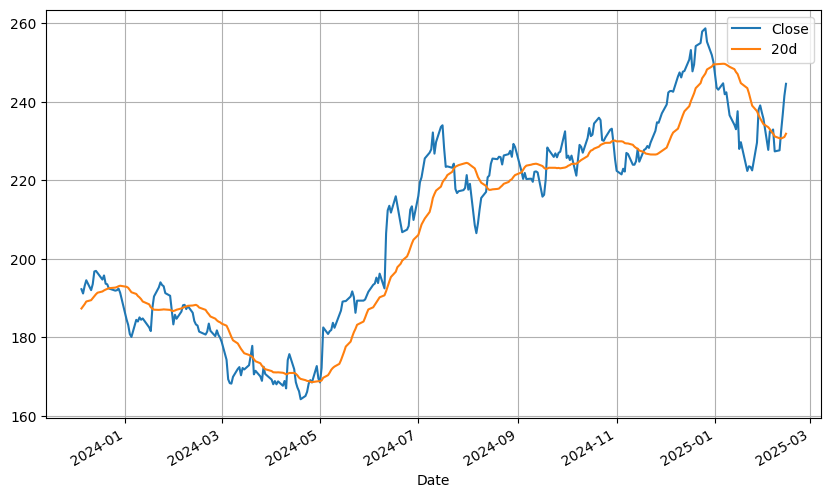

In [74]:
#plot both the actual price and the 20-d average.
AAPL[["Close", "20d"]].tail(300).plot(grid = True); 

Notice that the moving averages "smooths" the time series. This can sometimes make it easier to identify trends. The larger $q$, the less responsive a moving average is to fast fluctuations in the series $x_t$. 
So, if these fast fluctuations are considered "noise", a moving average will identify the "signal". 
* *Fast moving averages* have smaller $q$ and more closely follow the time series. 
* *Slow moving averages* have larger $q$ and respond less to the fluctuations of the stock.

### Task 1.9: Let's compare the 20-day, 50-day, and 200-day moving averages

Compute them below and then plot them together with the stock price.

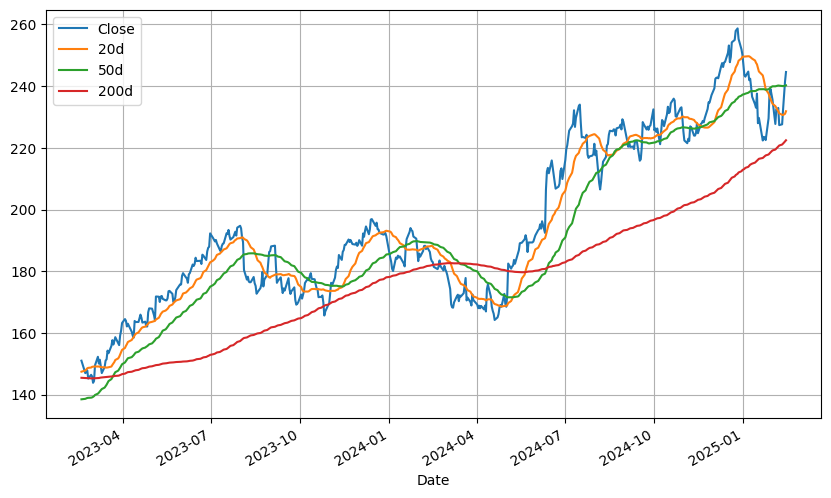

In [75]:
AAPL["50d"] =AAPL['Close'].rolling(window=50).mean()
AAPL["200d"] = AAPL['Close'].rolling(window=200).mean()

#plotting
AAPL[["Close", "20d", "50d", "200d"]].tail(500).plot(grid = True); 

### Trading strategies and backtesting 


**Trading** is the practice of buying and selling financial assets for the purpose of making a profit. Traders develop **trading strategies** that a computer can use to make trades. Sometimes, these can be very complicated (esp. when they employ exogenous factors and data like [Twitter](https://www.theatlantic.com/technology/archive/2011/03/does-anne-hathaway-news-drive-berkshire-hathaways-stock/72661/), but other times traders make decisions based on finding patterns or trends in charts. 

One example is called the [moving average crossover strategy](http://www.investopedia.com/university/movingaverage/movingaverages4.asp). 
This strategy is based on two moving averages, a "fast" one and a "slow" one. The strategy is:

* Trade the asset when the fast moving average crosses over the slow moving average.
* Exit the trade when the fast moving average crosses over the slow moving average again.

A trade will be prompted when the fast moving average crosses from below to above the slow moving average, and the trade will be exited when the fast moving average crosses below the slow moving average later.

This is the outline of a complete strategy and we already have the tools to get a computer to automatically implement the strategy.

But before we decide if we want to use it, we should first evaluate the quality of the strategy. The usual means for doing this is called **backtesting**, which is looking at how profitable the strategy is on historical data. 

You could now write python code that could implement and backtest a trading strategy. There are also lots of python packages for this:  
* [**pyfolio**](https://quantopian.github.io/pyfolio/) (for analytics)
* [**zipline**](http://www.zipline.io/beginner-tutorial.html) (for backtesting and algorithmic trading), and 
* [**backtrader**](https://www.backtrader.com/) (also for backtesting and trading). 




### Task 1.10: A simple trading strategy

Use the plot above (assuming that our 20-day moving average is the slow moving one and the 50-day moving average is the fast moving one) and based on the strategy we described above, determine when you should have bought (and also sold) Apple stock?

*your comments go here*

# Part 2: A forecasting problem

We will now apply some forecasting algorithms on a real dataset, namely the Berkeley Earth Surface Temperature Study. Dataset can be fount on [Berkeley Earth data](http://berkeleyearth.org/data/) page and combines 1.6 billion temperature reports from 16 pre-existing archives. It is nicely packaged and allows for slicing into interesting subsets (for example by country). They publish the source data and the code for the transformations they applied. They also use methods that allow weather observations from shorter time series to be included, meaning fewer observations need to be thrown away.

In [20]:
# import necessary libraries (again?)
import numpy as np 
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from itertools import product
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.sarimax import SARIMAX

import warnings
warnings.filterwarnings('ignore')

## 2.0 Dataset Exploration

In [21]:
data = pd.read_csv('data/GlobalLandTemperaturesByMajorCity.csv')

In [22]:
# show first few records
data.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [23]:
# show a concise summary of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


## 2.1 Preprocessing, Advanced Visualisation and Stationarity

Let's isolate Toronto and consider the data of this city to be our dataset. The target is the `AverageTemperature` column, that is the Average Temperature for that specific month. We have data from 1743 to 2013.

In [24]:
toronto_data = data[data['City'] == 'Toronto']

In [25]:
toronto_data.head(7)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
229690,1743-11-01,-0.106,1.905,Toronto,Canada,44.20N,80.50W
229691,1743-12-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229692,1744-01-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229693,1744-02-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229694,1744-03-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229695,1744-04-01,5.892,2.249,Toronto,Canada,44.20N,80.50W
229696,1744-05-01,12.050,1.830,Toronto,Canada,44.20N,80.50W


### Task 2.1 The `AvergateTemperature` has some missing data. Determine how many they are and find a (suitable) technique to fill it

In [26]:
#your code goes here

In [27]:
# check missing values
toronto_data.head(10)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
229690,1743-11-01,-0.106,1.905,Toronto,Canada,44.20N,80.50W
229691,1743-12-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229692,1744-01-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229693,1744-02-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229694,1744-03-01,NaN,NaN,Toronto,Canada,44.20N,80.50W
229695,1744-04-01,5.892,2.249,Toronto,Canada,44.20N,80.50W
229696,1744-05-01,12.050,1.830,Toronto,Canada,44.20N,80.50W
229697,1744-06-01,17.857,1.720,Toronto,Canada,44.20N,80.50W
229698,1744-07-01,19.130,1.553,Toronto,Canada,44.20N,80.50W
229699,1744-08-01,NaN,NaN,Toronto,Canada,44.20N,80.50W


The `dt` column identifies the year and the month. It is better to convert this column into a datetime object and to explicitly identify the year and the month in two different columns.

In [28]:
toronto_data = toronto_data.reset_index()
toronto_data = toronto_data.drop(columns = ['index'])
toronto_data.dt = pd.to_datetime(toronto_data.dt)

ValueError: time data "01/01/1900" doesn't match format "%Y-%m-%d", at position 1874. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
YEAR = []
MONTH = []
DAY = []
WEEKDAY = []
for i in range(len(toronto_data)):
    WEEKDAY.append(toronto_data.dt[i].weekday())
    DAY.append(toronto_data.dt[i].day)
    MONTH.append(toronto_data.dt[i].month)
    YEAR.append(toronto_data.dt[i].year)

In [ ]:
toronto_data['Year'] = YEAR
toronto_data['Month'] = MONTH
toronto_data['Day'] = DAY 
toronto_data['Weekday'] = WEEKDAY

In [ ]:
change_year_index = []
change_year = []
year_list = toronto_data['Year'].tolist()
for year in range(0, len(year_list) - 1):
    if year_list[year] != year_list[year + 1]:
        change_year.append(year_list[year + 1])
        change_year_index.append(year + 1)

In [ ]:
toronto_data.loc[change_year_index].head()

Below we can describe three functions:
1. `get_timeseries(start_year,end_year)`:  extracts the portion of the dataset between the two years 
1. `plot_timeseries(start_year,end_year)`:  plots the timeseries extracted in get_timeseries in a readable way
1. `plot_from_data(data, time, display_options)`:  plots the data (AverageTemperature) wrt the time (dt) in a readable way. The display options permit to display the ticks, change the colors, set the label


In [ ]:
def get_timeseries(start_year,end_year):
    last_year_data = toronto_data[(toronto_data.Year >= start_year) & (toronto_data.Year <= end_year)].reset_index().drop(columns = ['index'])
    return last_year_data

In [ ]:
def plot_timeseries(start_year,end_year):
    last_year_data = get_timeseries(start_year,end_year)
    P = np.linspace(0, len(last_year_data) - 1, 5).astype(int)
    plt.plot(last_year_data.AverageTemperature, marker = '.', color = '#003366')
    plt.xticks(np.arange(0, len(last_year_data), 1)[P], last_year_data.dt.loc[P])
    plt.xlabel('Date (Y/M/D)')
    plt.ylabel('Average Temperature')

In [ ]:
#modified
def plot_from_data(df, time_col, c='#003366', with_ticks=True, label=None):
    # Plot the DataFrame directly using the pandas plot method
    # This will automatically use the time column for the x-axis and the data column for the y-axis
    ax = df.plot(x=time_col, y=df.values, marker='.', color=c, label=label, figsize=(12, 7))
    #   ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) 
    # Handle x-ticks to avoid overlap
    if with_ticks:
        ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels
    ax.set_xlabel('Date (Y/M/D)')
    ax.set_ylabel('Average Temperature')

Here is an example use of plotting data for different decades

In [ ]:
plt.figure(figsize = (20, 20))
# plt.title(figure_title, )
plt.suptitle('Plotting Four Decades', fontsize = 30, color = '#003366', y = 1.03)
plt.subplot(2, 2, 1)
plt.title('Starting year: 1800, Ending Year: 1810', fontsize = 15)
plot_timeseries(1800, 1810)
plt.subplot(2, 2, 2)
plt.title('Starting year: 1900, Ending Year: 1910', fontsize = 15)
plot_timeseries(1900, 1910)
plt.subplot(2, 2, 3)
plt.title('Starting year: 1950, Ending Year: 1960', fontsize = 15)
plot_timeseries(1950, 1960)
plt.subplot(2, 2, 4)
plt.title('Starting year: 2000, Ending Year: 2010', fontsize = 15)
plot_timeseries(2000, 2010)
plt.tight_layout();

When we use ARIMA models, we should be considering stationary time series. In order to check if the timeseries we are considering is stationary, we can check the correlation and autocorrelation plots.

### Task 2.2: Plot the ACF/PACF and make observations

In [ ]:
#plot acf and pacf

*your comments here*

### Task 2.3: Run the ADF statistic test on the whole series and then on one decade. What do you observe?

In [ ]:
result = adfuller(toronto_data.AverageTemperature)
print('ADF Statistic on the entire dataset: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

In [ ]:
result = adfuller(toronto_data.AverageTemperature[0:120])
print('ADF Statistic on the first decade: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

### Task 2.4: Take differences and try to stationarize the series

If we take differencing does the timeseries become stationary?

In [ ]:
#your code here
#your comments as well

## Building an ARIMA model

Let's consider the 1992–2013 decade and plot it.

In [ ]:
plt.figure(figsize = (12, 7))
plt.title('The dataset used for prediction', fontsize = 20, color = '#003366')
plot_timeseries(1992, 2013)

Next we split the data to training and testing and plot it.

Remember that it's timeseries, therefore the last past will always be used as validation and the first part of the series as training. Any deviation might lead to data leakage.

In [ ]:
# perform the train/test split.
temp = get_timeseries(1992, 2013)
N = len(temp.AverageTemperature)
split = 0.95
training_size = round(split * N)
print(training_size)
test_size = round((1 - split) * N)
print(test_size)
series = temp.AverageTemperature[ : training_size]
date = temp.dt[:training_size]
series_df = pd.Series(series.values,index=date)

# Test data (last 5%)
test_series = temp.AverageTemperature[training_size:]
test_date = pd.to_datetime(temp.dt[training_size:])
test_series_df = pd.Series(test_series.values, index=test_date)

In [ ]:
# plot the split
plt.figure(figsize = (12, 7))
plot_from_data(series, date, label = 'Training Set')
plot_from_data(test_series, test_date, 'green', with_ticks = True, label = 'Test Set')
plt.legend();

In [ ]:
test_series = temp.AverageTemperature[len(date)-1 : len(temp)]
test_date = temp.dt[len(date)-1 : len(temp)]

We are going to apply ARIMA models and more specifically we are going to use a function to determine what is the best ARIMA Model based on a range of values for p and q. Study the function below.

In [ ]:
def optimize_ARIMA(order_list, exog):
    """
    Optimize ARIMA model by testing different (p, d, q) orders and returning a dataframe
    with the corresponding Akaike Information Criterion (AIC) scores.

    Parameters:
        order_list (list of tuples): List of (p, d, q) tuples to evaluate.
        exog (array-like): Exogenous variable for the ARIMA model.

    Returns:
        pd.DataFrame: DataFrame containing (p, d, q) orders and their respective AIC scores,
                      sorted in ascending order (lower AIC is better).
    """
    
    results = []  # Store model results as (order, AIC) pairs
    
    for order in tqdm(order_list):  # Iterate through each (p, d, q) combination
        try:
            # Fit the ARIMA model with the given order
            model = SARIMAX(exog, order=order).fit(disp=-1)
            
            # Get the AIC value for model evaluation
            aic = model.aic  
            
            # Store results as a list of tuples
            results.append([order, aic])
            
            # Convert results into a DataFrame
            result_df = pd.DataFrame(results, columns=['(p, d, q)', 'AIC'])
            
            # Sort results by AIC in ascending order (lower is better)
            result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
        
        except Exception as e:
            # Handle cases where a model fails to fit
            print(f"Skipping order {order} due to error: {e}")
        
        continue  # Continue iterating even if an exception occurs
    
    return result_df  # Return the sorted DataFrame of results

First, we take the zero-differentiated ARIMA models and evaluate them using the AIC.

### Task 2.5 Pick some reasonable upper bounds for p and q and run the code below. Print the results on comment on these.

In [ ]:
maxp = ... #determine the the maximum order p
maxq = ... #determine the the maximum order q

ps = range(0, maxp, 1)
d = 0
qs = range(0, maxq, 1)

# Create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_0 = optimize_ARIMA(order_list, exog = series)

In [ ]:
print(result_d_0.head())

*Comment on the results*

The first-differentiated models are considered below.

### Task 2.6 Pick some reasonable upper bounds for p and q and run the code below. Print the results on comment on these.

In [ ]:
maxp=...
maxq=...

ps = range(0, maxp, 1)
d = 1
qs = range(0, maxq, 1)

# create a list with all possible combination of parameters
parameters = product(ps, qs)
parameters_list = list(parameters)

order_list = []

for each in parameters_list:
    each = list(each)
    each.insert(1, d)
    each = tuple(each)
    order_list.append(each)
    
result_d_1 = optimize_ARIMA(order_list, exog = series)

In [ ]:
result_d_1.head()

*Comment on the results*

### Task 2.7 Pick a model based on how good it performs (take into account small variations in the performance) and plot the residual plot

In [ ]:
best_model_params= ...

In [ ]:
best_model = SARIMAX(series, order = best_model_params).fit()
print(best_model)

Plot the fit diagnostics and comment

In [ ]:
best_model.plot_diagnostics(figsize = (15, 12))
plt.show()

*Comment here*

## 2.4 Forecasting

In the last part we are going to use our best model for forecasting and evaluate it's performance. Most of the code is given but you just need to interpret the results

Let's plot the results of the forecasting operation:

In [ ]:
fore_l= test_size - 1
forecast = best_model.get_prediction(start = training_size, end = training_size + fore_l)
forec = forecast.predicted_mean
ci = forecast.conf_int(alpha = 0.05)

In [ ]:
test_series = temp.AverageTemperature[len(date)-1 : len(temp)]
error_test = toronto_data.loc[test_date[1:].index.tolist()].AverageTemperatureUncertainty
index_test = test_date[1:].index.tolist()
test_set = test_series[1:]
lower_test = test_set - error_test
upper_test = test_set + error_test

In [ ]:
x0 = toronto_data.AverageTemperature.index[0 : training_size]
x1 = toronto_data.AverageTemperature.index[training_size : training_size + fore_l + 1]

In [ ]:
fig, ax = plt.subplots(figsize=(16, 8), dpi=300)

# Plot training data
plt.plot(x0, toronto_data.AverageTemperature[0:training_size], 'k', label='Training Set')

# Plot actual test data
plt.plot(toronto_data.AverageTemperature[training_size:training_size + fore_l], '.k', label='Actual Test Data')

# Plot forecast directly from forec
ax.plot(x1, forec, color='Darkorange', label='Forecast (best_model_0)', marker='.')
ax.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'], 
                alpha=0.2, label='Confidence Interval (95%)', color='grey')

# Plot lower and upper bounds for the test set
ax.fill_between(x1, lower_test, upper_test, alpha=0.2, label='Test Set Bounds', color='lightgreen')

# Add legend, labels, and title
plt.legend(loc='upper left')
plt.xlim(80,)
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
plt.title('Forecast vs Actual Temperature')
plt.show()


And now let's consider the specific predicted zone with the correspondent Uncertainty (the one given by the dataset) and the confidence interval (given by the algorithm):

In [ ]:
plt.figure(figsize = (15, 15))
plt.subplot(2, 1, 1)
plt.fill_between(x1, lower_test, upper_test, alpha = 0.2, label = 'Test set error range', color = 'navy')
plt.plot(test_set, marker = '.', label = 'Actual', color = 'navy')
plt.plot(forec, marker = 'd', label = 'Forecast', color = 'green')
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature')
#plt.fill_between(x1, s_ci['lower AverageTemperature'], s_ci['upper AverageTemperature'],alpha=0.3, label = 'Confidence inerval (95%)',color='firebrick')
plt.legend()
#plt.subplot(2, 1, 2)
#plt.fill_between(x1, lower_test, upper_test,alpha=0.2, label = 'Test set error range',color='navy')
#plt.plot(test_set, marker = '.', label = 'Actual', color = 'navy')
#plt.plot(s_forec, marker = 'd', label = 'Forecast', color = 'firebrick')
#plt.fill_between(x1, ci['lower AverageTemperature'], ci['upper AverageTemperature'], alpha = 0.3, label = 'Confidence inerval (95%)', color = 'firebrick')
plt.legend()
plt.xlabel('Index Datapoint')
plt.ylabel('Temperature');

### Task 2.8 Comment on the forecasting result. Is it good or bad? Can you only judge from the plot?

*your answer here*

### Task 2.9 Finally, compute the Mean Absolute Error (MAE) and the Mean Squared Error (MSE) for the predictions on the test set. Comment on what do these values mean.

In [ ]:
#your code here
#forec should hold the prediction
#test_series should hold the real value

#MAE
...

#MSE
...

*your answer here*